WHAT IS BAYES THEOREM?

Bayes theorem is what allows us to go from a sampling (or likelihood) distribution and a prior distribution to a posterior distribution.

WHAT IS A SAMPLING DISTRIBUTION?

A sampling distribution is the probability of seeing our data (X) given our parameters (θ). This is written as p(X|θ).

For example, we might have data on 1,000 coin flips. Where 1 indicates a head. This can be represented in python as

In [101]:
import numpy as np
data_coin_flips = np.random.randint(2, size=1000)
np.mean(data_coin_flips)

0.47499999999999998

A sampling distribution allows us to specify how we think these data were generated. For our coin flips, we can think of our data as being generated from a Bernoulli Distribution. This distribution takes one parameter p which is the probability of getting a 1 (or a head for a coin flip). It then returns a value of 1 with probablility p and a value of 0 with probablility (1-p).

You can see how this is perfect for a coin flip. With a fair coin we know our p = .5 because we are equally likely to get a 1 (head) or 0 (tail). We can create samples from this distribution like this:

In [102]:
bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
np.mean(bernoulli_flips)

0.48999999999999999

Now that we have defined how we believe our data were generated, we can calculate the probability of seeing our data given our parameters p(X|θ). Since we have selected a Bernoulli distribution, we only have one parameter: p.

We can use the probability mass function (PMF) of the Bernoulli distribution to get our desired probability for a single coin flip. The PMF takes a single observed data point and then given the parameters (p in our case) returns the probablility of seeing that data point given those parameters. For a Bernoulli distribution it is simple: if the data point is a 1 the PMF returns p, if the data point is a 0 it returns (1-p). We could write a quick function to do this:

In [55]:
def bern_pmf(x, p):
    if (x == 1):
        return p
    elif (x == 0):
        return 1 - p
    else:
        return "Value Not in Support of Distribution"

We can now use this function to get the probability of a data point give our parameters. You probably see that with p = .5 this function always returns .5

In [56]:
print(bern_pmf(1, .5))
print(bern_pmf(0, .5))

0.5
0.5


Scipy has most of these built in. We can draw from the PMF as follows:

In [103]:
import scipy.stats as st
print(st.bernoulli.pmf(1, .5))
print(st.bernoulli.pmf(0, .5))

0.5
0.5


Now, how do we find the probability of all 1,000 of our data points. Here, we assume that our data are independent and identically distributed. This assumption allows us to say the probability of seeing all of our data is just the product of each individual probability: p(x1,…,xn|β)=p(x1|β)∗…∗p(xn|β). Which is:

In [104]:
np.product(st.bernoulli.pmf(data_coin_flips, .5))

9.3326361850321888e-302

This is only one distribution. We have only tested our model with p = 0.5, but what if p = 0.8? or 0.2? What would the probablility of our data look like then? Let us make a grid of 100 values between 0 and 1 for various vlaues of p between 0 and 1 and then calculate the probability of seeing our data given each of these values.

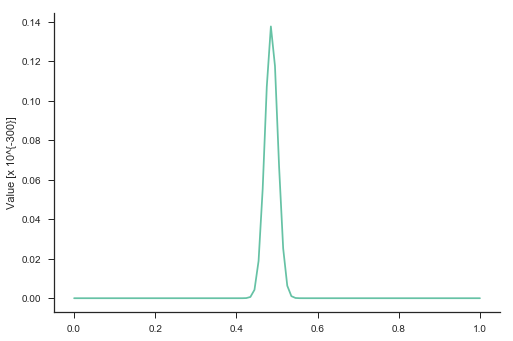

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')

params = np.linspace(0, 1, 100)
p_x = [np.product(st.bernoulli.pmf(data_coin_flips, p)) for p in params]
p_x = [i * 1e300 for i in p_x]
plt.plot(params, p_x)
plt.ylabel(r'Value [x 10^{-300}]')
sns.despine()

We can see that the probablility of seeing our data peaks at p=0.5 and almost certainly is between p=0.4 and p=0.6. Nice. So now we have a good idea of what p value generated our data assuming it was drawn from a Bernoulli distribution. 

PRIOR DISTRIBUTION

Bayes theorem says that we need to think about both our sampling distribution and our prior distribution. What do I mean by prior distribution? It is the p(θ) or the probability of seeing a specific value for our parameter. In our sampling distribution we defined 100 values from 0 to 1 for our parameter p. Now we must define the prior probability of seeing each of those values. That is the probability we would have assumed before seeing any data. Most likely, we would have assumed a fair coin, which looks like the distribution above. Lets see how we can do this:

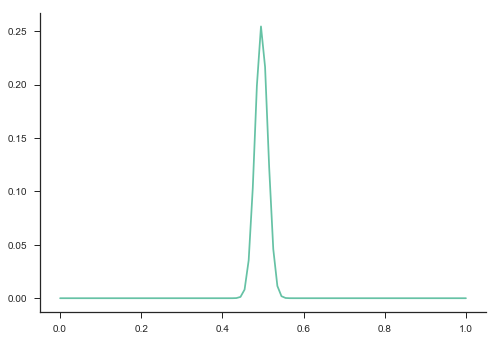

In [107]:
fair_flips = bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
p_fair = np.array([np.product(st.bernoulli.pmf(fair_flips, p)) for p in params])
p_fair = p_fair / np.sum(p_fair)
plt.plot(params, p_fair)
sns.despine()

The sampling and prior distributions look exactly the same. Let us see what happens when we change our data to be an unfair coin:

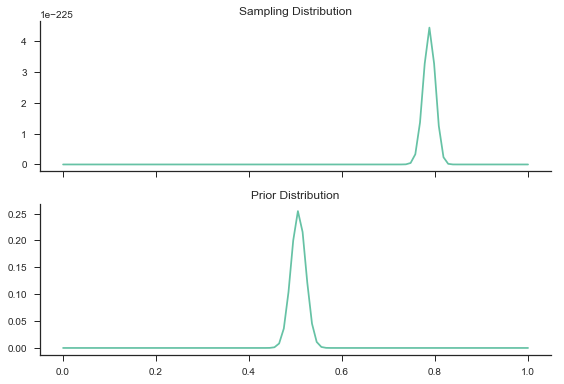

In [43]:
unfair_flips = bernoulli_flips = np.random.binomial(n=1, p=.8, size=1000)
p_unfair = np.array([np.product(st.bernoulli.pmf(unfair_flips, p)) for p in params])
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(params, p_unfair)
axes[0].set_title("Sampling Distribution")
axes[1].plot(params, p_fair)
axes[1].set_title("Prior Distribution")
sns.despine()
plt.tight_layout()


BAYES THEOREM (POSTERIOR DISTRIBUTION)

Bayes theorem is what allows us to go from our sampling and prior distributions to our posterior distribution. The posterior distribution is the P(θ|X) or simply, the probability of our parameters given our data.

Let P(A) = the probability that A occurs
Then P(A|B) = the probability that A occurs, given that B has occured
And the joint distrbution is P(A and B) = P(A) * P(A|B)

By definition of conjoint probability:
P(A and B) = P(A) * P(A|B) is same as P(B and A) = P(B) * P(B|A)

Therefore equating the right hand sides, 
         P(B) * P(B|A) = P(A) * P(A|B)

Diving by P(B) on both sides,
         P(B|A) = P(A) * P(A|B)/P(B)   
This is the Bayes theorem. Basically, use what you know to predict what you don't know.

Below code uses our assumption of fair coin as prior and estimates if the ecidence supports the hypothesis. 

In [44]:
def bern_post(n_params=100, n_sample=100, true_p=.8, prior_p=.5, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    return posterior

We can see that the posetior probability after considering prior shows that there is evidence that the coin may not be fair with being partial to head's side, which is what our p is. Here we can say H0 = Coin is fair or p = 0.5. And the alternate hyphothesis will be that the coin is not fair or HA != 0.5.

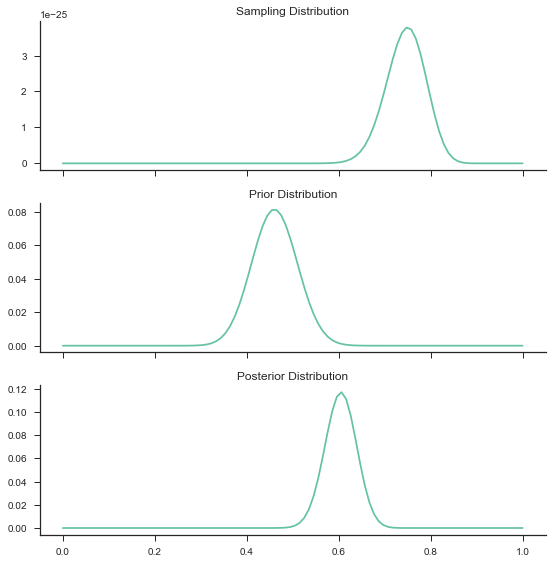

In [45]:
example_post = bern_post()

However, if we have more data, prior distribution matters less. 

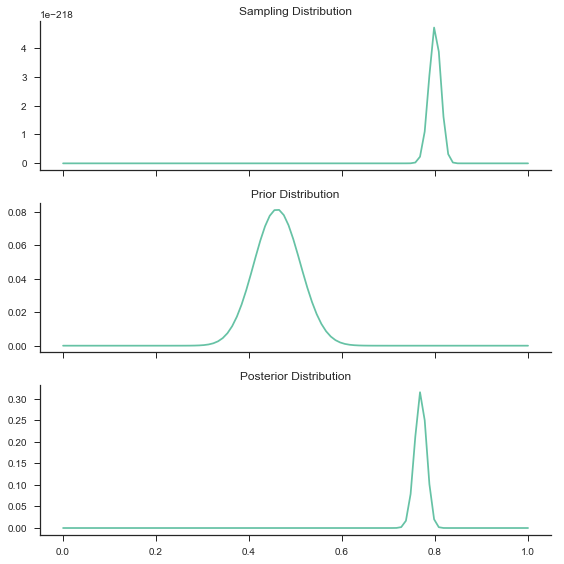

In [46]:
moredata_post = bern_post(n_sample=1000)